In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [82]:
#remove initial nan values fron ph
phsf=phs[117:]
phsf

[8.1097,
 nan,
 8.1092,
 8.1168,
 8.1316,
 8.1218,
 nan,
 8.1158,
 8.1018,
 8.0991,
 8.093,
 8.099,
 8.0858,
 8.1101,
 nan,
 8.1332,
 8.1229,
 8.134,
 8.1229,
 8.1167,
 8.1232,
 8.1084,
 nan,
 8.085,
 nan,
 nan,
 8.1212,
 nan,
 8.1256,
 8.1263,
 8.1231,
 8.1144,
 8.1139,
 8.112,
 8.0992,
 8.0943,
 8.0981,
 nan,
 8.104,
 8.1177,
 8.1256,
 8.119,
 8.1099,
 nan,
 8.1152,
 8.0977,
 8.0956,
 8.0933,
 8.087,
 8.1052,
 8.1161,
 8.1349,
 8.1325,
 nan,
 8.1074,
 8.1105,
 nan,
 nan,
 nan,
 8.0802,
 8.094,
 nan,
 nan,
 8.1508,
 8.1357,
 8.1204,
 nan,
 nan,
 8.1021,
 8.0858,
 8.0883,
 8.0875,
 8.088,
 8.1048,
 nan,
 nan,
 8.1099,
 8.1171,
 8.1038,
 8.1149,
 nan,
 8.0937,
 8.0933,
 8.0886,
 8.0997,
 8.1135,
 nan,
 8.1074,
 nan,
 8.1122,
 8.1066,
 8.0946,
 8.0902,
 8.0889,
 8.0829,
 nan,
 8.0836,
 8.0924,
 8.1014,
 8.1102,
 8.0856,
 8.1138,
 8.1155,
 8.101,
 8.1058,
 8.0895,
 8.089,
 8.0805,
 nan,
 nan,
 8.1083,
 8.1097,
 8.1135,
 8.1044,
 8.1078,
 8.105,
 8.0937,
 8.0805,
 8.0818,
 8.076,
 8.0818,


In [84]:
dictph = {'Time': times[117:], 'ph':phs[117:]}
dfph2 = pd.DataFrame(dictph)
dfphf = dfph2.interpolate()
ph_test = dfphf['ph'].tolist() 
time_test = dfphf['Time'].tolist()

In [6]:
#make a separateph and matching time lists because ph is missing values
dfph1={'Time': times, 'ph': phs} #make dictionary of time and ph
dfph = pd.DataFrame(dfph1) #make dataframe
dfph.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs2 = dfph['ph'].tolist() 
timeph = dfph['Time'].tolist()

In [4]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [85]:
#convert data to np arrays to use polyfit
times_np = np.array(times)
timeph_np = np.array(timeph)
time_test_np = np.array(time_test)
co2_np = np.array(co2s)
temp_np = np.array(temps)
sea_ice_ext_np = np.array(sea_ice_exts)
pH_np = np.array(phs2)
ph_np = np.array(ph_test)

In [89]:
#normalize the datasets to compare the trends
co2_max = max(co2_np)
co2n_np = (co2_np)/co2_max

temp_max = max(temp_np)
tempn_np = (temp_np)/temp_max

ice_max = max(sea_ice_ext_np)
icen_np = (sea_ice_ext_np)/ice_max

ph_max = max(pH_np)
phn_np = (pH_np)/ph_max

ph_max_2 = max(ph_np)
phn_2_np = (ph_np)/ph_max_2

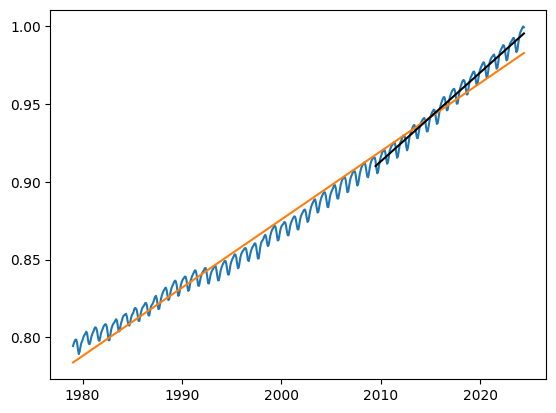

In [26]:
a, b = np.polyfit(times_np, co2n_np, 1)
a2, b2 = np.polyfit(times_np[-180:],co2n_np[-180:], 1)
plt.plot(times,co2n_np)
plt.plot(times,a*times_np+b)
plt.plot(times[-180:],a2*times_np[-180:]+b2,color='k')

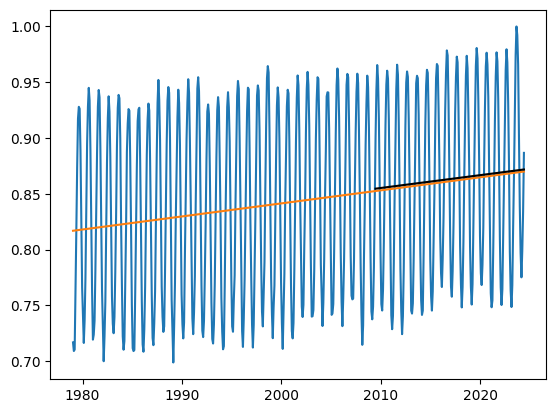

In [41]:
a_temp, b_temp = np.polyfit(times_np, tempn_np, 1)
a2_temp, b2_temp = np.polyfit(times_np[-180:],tempn_np[-180:], 1)
plt.plot(times,tempn_np)
plt.plot(times,a_temp*times_np+b_temp)
plt.plot(times[-180:],a2_temp*times_np[-180:]+b2_temp,color='k')

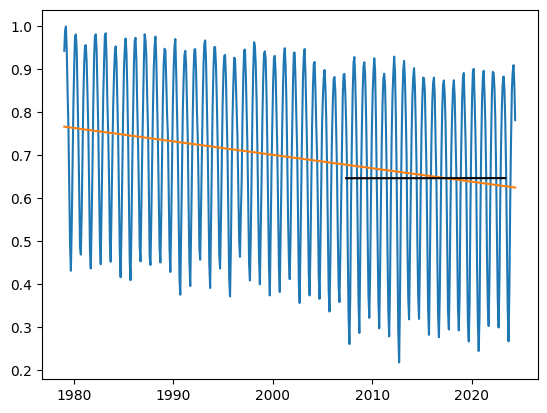

In [112]:
a_ice, b_ice = np.polyfit(times_np, icen_np, 1)
a2_ice, b2_ice = np.polyfit(times_np[340:-12],icen_np[340:-12], 1)
plt.plot(times,icen_np)
plt.plot(times,a_ice*times_np+b_ice)
plt.plot(times[340:-12],a2_ice*times_np[340:-12]+b2_ice,color='k')

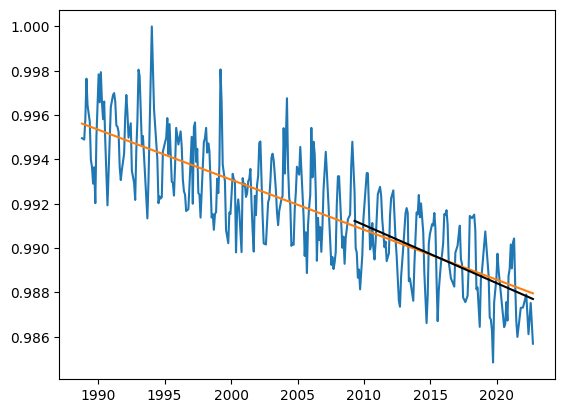

In [87]:
a_ph, b_ph = np.polyfit(timeph_np, phn_np, 1)
a2_ph, b2_ph = np.polyfit(timeph_np[-120:],phn_np[-120:], 1)
plt.plot(timeph,phn_np)
plt.plot(timeph,a_ph*timeph_np+b_ph)
plt.plot(timeph[-120:],a2_ph*timeph_np[-120:]+b2_ph,color='k')

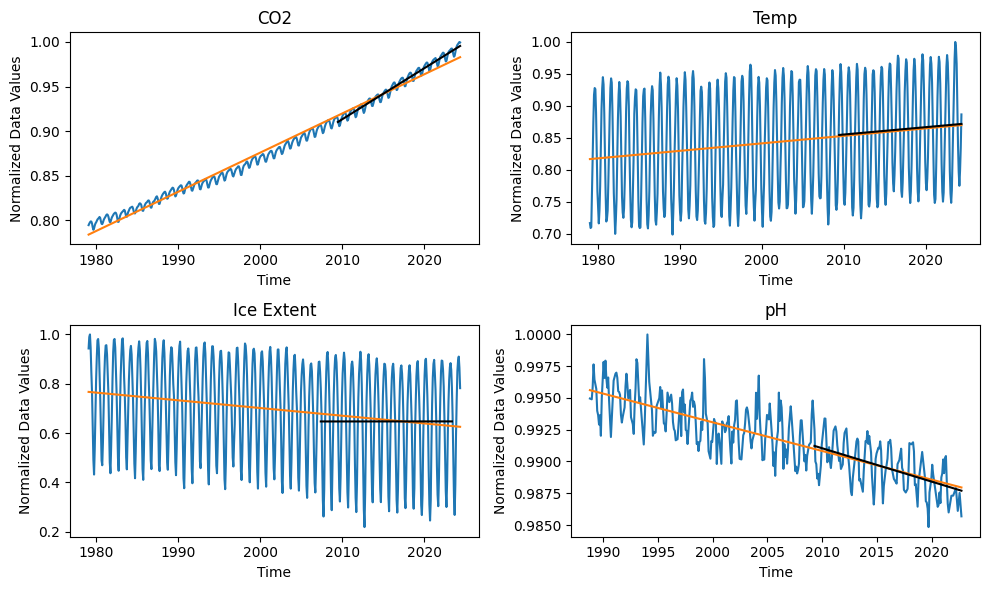

<Figure size 2000x1200 with 0 Axes>

In [126]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times,co2n_np)
axs[0, 0].plot(times,a*times_np+b)
axs[0, 0].plot(times[-180:],a2*times_np[-180:]+b2,color='k')
axs[0, 0].set_title('CO2')
axs[0, 1].plot(times,tempn_np)
axs[0, 1].plot(times,a_temp*times_np+b_temp)
axs[0, 1].plot(times[-180:],a2_temp*times_np[-180:]+b2_temp,color='k')
axs[0, 1].set_title('Temp')
axs[1, 0].plot(times,icen_np)
axs[1, 0].plot(times,a_ice*times_np+b_ice)
axs[1, 0].plot(times[340:-12],a2_ice*times_np[340:-12]+b2_ice,color='k')
axs[1, 0].set_title('Ice Extent')
axs[1, 1].plot(timeph,phn_np)
axs[1, 1].plot(timeph,a_ph*timeph_np+b_ph)
axs[1, 1].plot(timeph[-120:],a2_ph*timeph_np[-120:]+b2_ph,color='k')
axs[1, 1].set_title('pH')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Normalized Data Values')

fig.tight_layout()
fig.savefig('images/trends.pdf', dpi=300, bbox_inches='tight')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

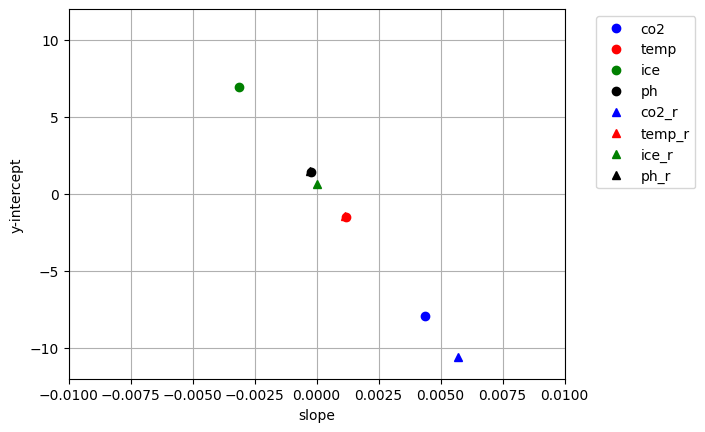

In [113]:
plt.plot(a,b,'o',color='b',label='co2')
plt.plot(a_temp,b_temp,'o',color='r',label='temp')
plt.plot(a_ice,b_ice,'o',color='g',label='ice')
plt.plot(a_ph,b_ph,'o',color='k',label='ph')

plt.plot(a2,b2,'^',color='b',label='co2_r')
plt.plot(a2_temp,b2_temp,'^',color='r',label='temp_r')
plt.plot(a2_ice,b2_ice,'^',color='g',label='ice_r')
plt.plot(a2_ph,b2_ph,'^',color='k',label='ph_r')
plt.xlabel('slope')
plt.ylabel('y-intercept')
plt.xlim(-0.01,0.01)
plt.ylim(-12,12)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')